## Chargement des librairies

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Chargement de la BDD et création d'une copie sur laquelle travailler, puis affichage du head

In [27]:
df_2018_original = pd.read_csv("2018.csv")
df_2018 = df_2018_original.copy()
df_2018.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745,...,46.0,49.0,4.0,48,38.896,279.934211,1.273328,C2S1,-1.198684,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921,...,68.0,42.0,5.0,56,63.206,399.893092,0.913166,C3S1,-3.397862,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510,...,44.0,45.0,2.0,24,38.896,219.934211,1.319284,C2S1,-0.398684,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422,...,35.0,27.0,1.0,32,19.448,159.967105,0.928155,C2S1,0.000658,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321,...,280.0,298.0,5.0,56,92.378,519.843750,5.682664,C4S2,-4.396875,P.S.


In [28]:
df_2019_original = pd.read_csv("2019.csv")
df_2019 = df_2019_original.copy()
df_2019.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,EC,...,SO4-2,Na+,K+,Ca+2,Mg+2,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,6.45,post monsoon 2019,8.32,2355,...,377.0,273.0,113.0,80.0,82.654,539.860197,5.108509,C4S2,-3.797204,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,3.85,post monsoon 2019,8.30,565,...,52.0,89.0,14.0,48.0,4.862,139.991776,3.196982,C2S1,1.200164,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.45,post monsoon 2019,8.12,766,...,43.0,39.0,10.0,40.0,24.310,199.958882,1.199130,C3S1,-0.199178,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,3.95,post monsoon 2019,7.09,555,...,31.0,40.0,5.0,40.0,24.310,199.958882,1.229877,C2S1,0.400822,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,post monsoon 2019,7.97,735,...,28.0,44.0,16.0,72.0,34.034,319.942434,0.996598,C2S1,0.401151,P.S.


In [29]:
df_2020_original = pd.read_csv("2020.csv")
df_2020 = df_2020_original.copy()
df_2020.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,Unnamed: 8,pH,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,7.10,Post-monsoon 2020,NaN,8.01,...,33.00,171.0,9.0,24.0,72.930,359.876645,3.919146,C3S1,0.602467,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,3.35,Post-monsoon 2020,NaN,7.77,...,13.50,70.0,3.0,16.0,53.482,259.909539,1.887814,C3S1,-0.198191,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,5.05,Post-monsoon 2020,NaN,8.21,...,10.50,65.0,3.0,16.0,48.620,239.917763,1.824544,C2S1,0.001645,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,2.10,Post-monsoon 2020,NaN,8.3,...,7.25,31.0,1.0,16.0,29.172,159.950658,1.065714,C2S1,-0.199013,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,1.38,Post-monsoon 2020,NaN,7.67,...,14.50,129.0,2.0,32.0,5.000,82.878289,6.160862,C2S1,3.742434,U.S.


In [30]:
df_2018.dtypes.value_counts()

float64    15
object      6
int64       5
dtype: int64

### Suppression de feature inutile

In [31]:
df_2020 = df_2020.loc[:, ~df_2020.columns.str.contains('^Unnamed')]
df_2019=df_2019.rename(columns={"EC": "E.C", "CO_-2 ": "CO3", "HCO_ - ": "HCO3", "Cl -": "Cl", "F -": "F", "NO3- ": "NO3 ", "SO4-2": "SO4", "Na+": "Na", "K+": "K", "Mg+2": "Mg", "Ca+2": "Ca"})

## Analyse des features

In [32]:
df_2020['pH']=df_2020['pH'].replace('8..05', '8.05')

In [33]:
for i in range(df_2018.columns.size):
    if df_2018[df_2018.columns[i]].dtype != df_2019[df_2019.columns[i]].dtype or df_2019[df_2019.columns[i]].dtype != df_2020[df_2020.columns[i]].dtype:
        print(f"{df_2018.columns[i]}, \"{df_2018[df_2018.columns[i]].dtype}\" \"{df_2019[df_2019.columns[i]].dtype}\" \"{df_2020[df_2020.columns[i]].dtype}\"")

pH, "float64" "float64" "object"
CO3, "int64" "float64" "float64"
HCO3, "float64" "int64" "int64"
Ca, "int64" "float64" "float64"


In [34]:
df_2020['pH']=df_2020['pH'].astype(float)
df_2018['CO3']=df_2018['CO3'].astype(float)
df_2019['HCO3']=df_2019['HCO3'].astype(float)
df_2020['HCO3']=df_2020['HCO3'].astype(float)
df_2018['Ca']=df_2018['Ca'].astype(float)

In [35]:
frames = [df_2018, df_2019, df_2020]
df = pd.concat(frames, ignore_index=True)

In [36]:
df['Classification'].unique()

array(['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C1S1',
       'C3S4', 'C3S3', 'C2S2', 'OG', 'O.G'], dtype=object)

In [37]:
df['Classification'] = df['Classification'].replace('C3S1', "Poor")
df['Classification'] = df['Classification'].replace('C2S1', "Moderate")
df['Classification'] = df['Classification'].replace('C4S2', "Bad")
df['Classification'] = df['Classification'].replace('C4S1', "Bad")
df['Classification'] = df['Classification'].replace('C3S2', "Poor")
df['Classification'] = df['Classification'].replace('C4S4', "Bad")
df['Classification'] = df['Classification'].replace('C4S3', "Bad")
df['Classification'] = df['Classification'].replace('C1S1', "Good")
df['Classification'] = df['Classification'].replace('C3S4', "Bad")
df['Classification'] = df['Classification'].replace('C3S3', "Poor")
df['Classification'] = df['Classification'].replace('C2S2', "Moderate")
df = df[df.Classification != "OG"]
df = df[df.Classification != "O.G"]

In [38]:
df['Classification'].unique()

array(['Moderate', 'Poor', 'Bad', 'Good'], dtype=object)

### Affichage des données manquantes, puis de leur pourcentage pour chaque catégorie

In [39]:
print(df.isna().sum())
print(df.isna().sum()/df.shape[0])


sno                   0
district              0
mandal                0
village               0
lat_gis               0
long_gis              0
gwl                  11
season                0
pH                    0
E.C                   0
TDS                   0
CO3                 160
HCO3                  0
Cl                    0
F                     0
NO3                   0
SO4                   0
Na                    0
K                     0
Ca                    0
Mg                    0
T.H                   0
SAR                   0
Classification        0
RSC  meq  / L         0
Classification.1      0
dtype: int64
sno                 0.000000
district            0.000000
mandal              0.000000
village             0.000000
lat_gis             0.000000
long_gis            0.000000
gwl                 0.009982
season              0.000000
pH                  0.000000
E.C                 0.000000
TDS                 0.000000
CO3                 0.145191
HCO3           

### Affichage d'une heatmap

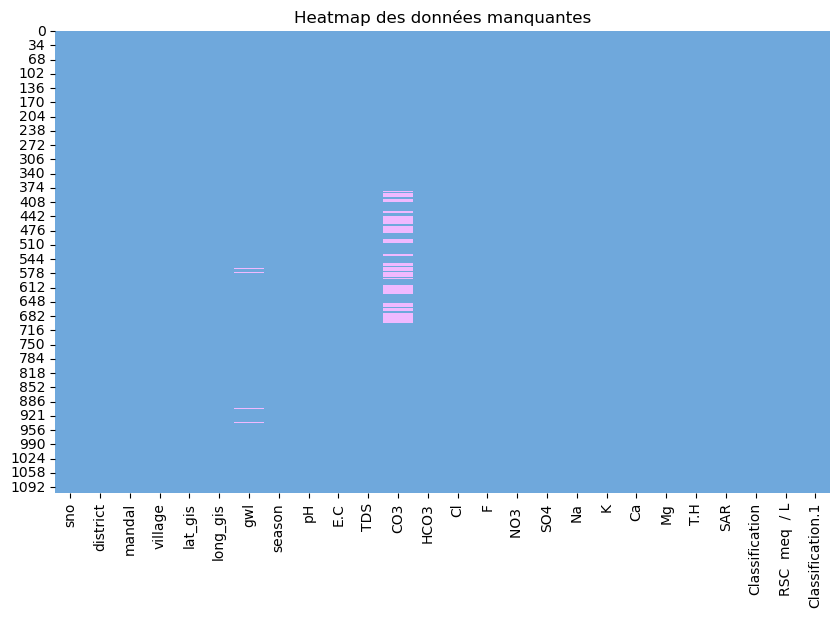

In [40]:
cmap = sns.color_palette(['#6fa8dc', '#F0B9FF'])

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap=cmap, cbar=False)
plt.title('Heatmap des données manquantes')
plt.show()

In [41]:
ct = 0
for i in df['Classification']:
    print(ct,i)
    ct+=1

0 Moderate
1 Poor
2 Moderate
3 Moderate
4 Bad
5 Poor
6 Poor
7 Poor
8 Bad
9 Moderate
10 Poor
11 Poor
12 Poor
13 Bad
14 Poor
15 Poor
16 Bad
17 Moderate
18 Poor
19 Moderate
20 Poor
21 Poor
22 Poor
23 Poor
24 Moderate
25 Moderate
26 Moderate
27 Poor
28 Poor
29 Poor
30 Poor
31 Poor
32 Poor
33 Poor
34 Poor
35 Poor
36 Poor
37 Poor
38 Poor
39 Moderate
40 Poor
41 Moderate
42 Poor
43 Poor
44 Poor
45 Poor
46 Poor
47 Moderate
48 Poor
49 Poor
50 Moderate
51 Poor
52 Poor
53 Poor
54 Moderate
55 Poor
56 Poor
57 Bad
58 Poor
59 Poor
60 Bad
61 Poor
62 Bad
63 Poor
64 Moderate
65 Poor
66 Bad
67 Bad
68 Poor
69 Poor
70 Poor
71 Poor
72 Poor
73 Poor
74 Poor
75 Poor
76 Bad
77 Moderate
78 Poor
79 Poor
80 Moderate
81 Moderate
82 Poor
83 Poor
84 Moderate
85 Moderate
86 Poor
87 Moderate
88 Poor
89 Moderate
90 Moderate
91 Moderate
92 Poor
93 Moderate
94 Bad
95 Poor
96 Poor
97 Bad
98 Poor
99 Poor
100 Poor
101 Poor
102 Poor
103 Moderate
104 Poor
105 Poor
106 Poor
107 Poor
108 Poor
109 Poor
110 Moderate
111 Moderate
11

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1105
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               1102 non-null   int64  
 1   district          1102 non-null   object 
 2   mandal            1102 non-null   object 
 3   village           1102 non-null   object 
 4   lat_gis           1102 non-null   float64
 5   long_gis          1102 non-null   float64
 6   gwl               1091 non-null   float64
 7   season            1102 non-null   object 
 8   pH                1102 non-null   float64
 9   E.C               1102 non-null   int64  
 10  TDS               1102 non-null   float64
 11  CO3               942 non-null    float64
 12  HCO3              1102 non-null   float64
 13  Cl                1102 non-null   int64  
 14  F                 1102 non-null   float64
 15  NO3               1102 non-null   float64
 16  SO4               1102 non-null   float64


### Création des fonctions de traitement des données manquantes

In [43]:
df=df.drop(['sno', 'district', 'mandal', 'village', "lat_gis", "long_gis", "season", "Classification.1", "CO3", "gwl"], axis=1)

In [44]:
columns = [i for i in df if df[i].isna().sum()!=0]
print(columns)

[]


### Encoding des objets pour traitement

In [45]:
for i in df.select_dtypes('object'):
    encoded_df = pd.get_dummies(df[i])
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])

### Utilisation d'un traitement au choix

## Matrice de corrélation knnimputer

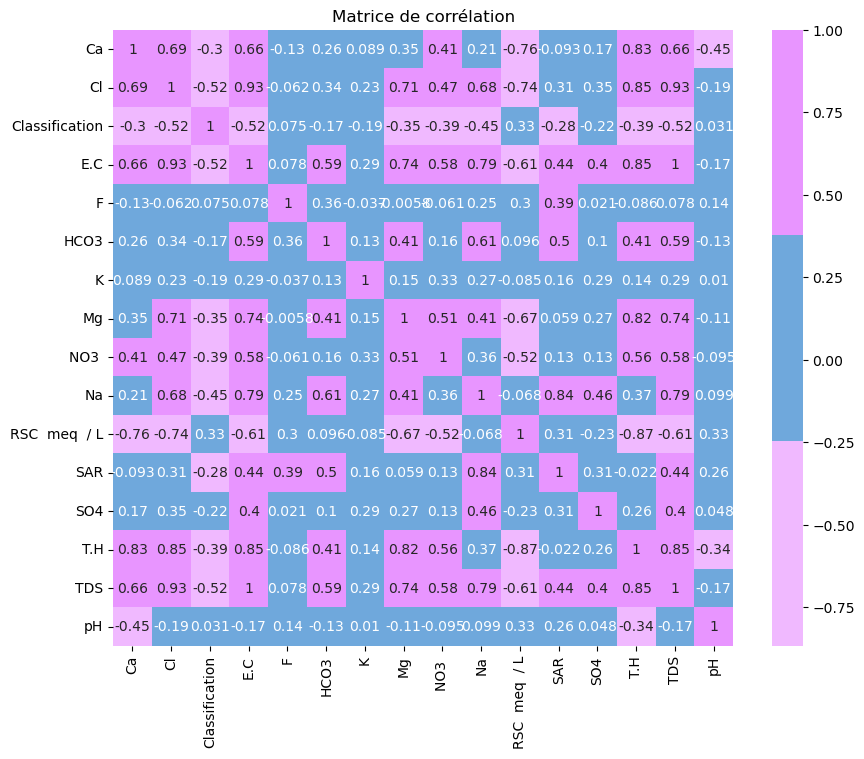

In [46]:
corr_matrix = df.corr().sort_index(axis=0).sort_index(axis=1)

cmap = sns.color_palette(['#F0B9FF', '#6fa8dc', '#e895ff'])

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap)
plt.title('Matrice de corrélation')
plt.show()

In [47]:
df=df.drop(['pH','F','HCO3','K','SO4'], axis=1)
df.head()

,E.C,TDS,Cl,NO3,Na,Ca,Mg,T.H,SAR,Classification,RSC meq / L
0,745,476.80,60,42.276818,49.0,48.0,38.896,279.934211,1.273328,2,-1.198684
1,921,589.44,80,100.659091,42.0,56.0,63.206,399.893092,0.913166,3,-3.397862
2,510,326.40,30,41.471545,45.0,24.0,38.896,219.934211,1.319284,2,-0.398684
3,422,270.08,10,10.669864,27.0,32.0,19.448,159.967105,0.928155,2,0.000658
4,2321,1485.44,340,128.843636,298.0,56.0,92.378,519.843750,5.682664,0,-4.396875


In [48]:
df.to_csv('dataset_cleaned.csv')